In [2]:
# 데이터 준비

import pandas as pd
from sklearn.model_selection import train_test_split

fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length', 'Diagonal', 'Height', 'Width']].to_numpy() # 입력 데이터
fish_target = fish['Species'].to_numpy() # 타깃 데이터

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42) # 훈련 세트와 테스트 세트

In [3]:
# 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [4]:
# 확률적 경사 하강법

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42) # log_loss: 로지스틱 손실 함수
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [5]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [6]:
sc.partial_fit(train_scaled, train_target) # partial_fit: 모델을 이어서 훈련

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [7]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [8]:
import numpy as np

sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [10]:
# 300번 에코프 동안 훈련 반복

for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

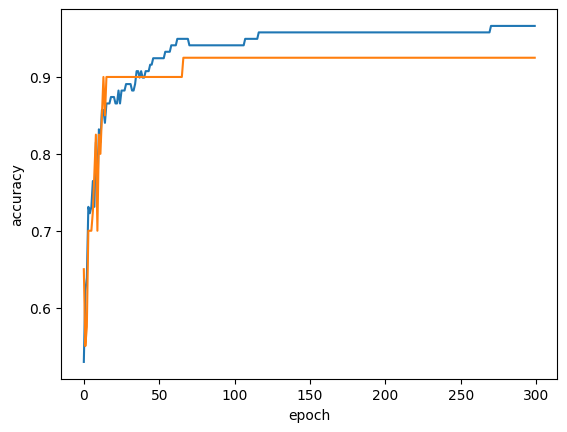

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [13]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [14]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [15]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42) # hinge: loss 매개변수의 기본 값
sc.fit(train_scaled, train_target)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [16]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
